# **Importing Libraries & Loading Data**

In [6]:
import numpy as np
import matplotlib.pyplot as plt                        # To visualize
import pandas as pd                                    # To read data
from sklearn.linear_model import LinearRegression

df2 = pd.read_csv('MLR.csv')                           # load data set
df2

,Quantity Demand,Price,Income
0,100.0,5,1000
1,75.0,7,600
2,80.0,6,1200
3,70.0,6,500
4,50.0,8,300
5,65.0,7,400
6,90.0,5,1300
7,100.0,4,1100
8,110.0,3,1300
9,60.0,9,300


**Here, We will be predicting Quantity Demand for Pirce = 6 and Income = 600**

Just for convenience, we have included it in our dataset. But we will train our model with data 0-9 index then predict value of 10th index

# **Multivariable Linear Regression Using Library Function**

slope, m =  [[-7.18824464  0.01429706]] , intercept, c =  [111.6918189]

Predicted Values:
[[ 90.04765687]
 [ 69.95234313]
 [ 85.71882446]
 [ 75.71088165]
 [ 58.47498014]
 [ 67.0929309 ]
 [ 94.33677522]
 [ 98.66560763]
 [108.7132645 ]
 [ 51.2867355 ]]

Coefficient of Determination, R^2 = 89.44%

Predicted QD: 77.14




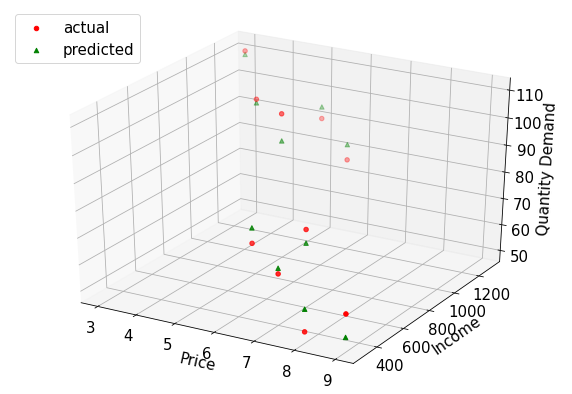

In [4]:
x = df2[['Price', 'Income']]
y = df2['Quantity Demand'].values.reshape(-1, 1)              # -1 means that calculate the dimension of rows, but have 1 column
predictValue = x[-1:]                                 # last row of x array
x = x[:-1]                                            # all rows of x array except last row
y = y[:-1]                                            # all rows of y array except last row

reg = LinearRegression()
reg.fit(x, y)                                         # fitting data in model
ypred = reg.predict(x)                                # finding yHat
R_square = reg.score(x, y) * 100                      # finding R^2
p = reg.predict(predictValue)                         # finding y by predicting

print("slope, m = ", reg.coef_, ", intercept, c = ", reg.intercept_)    
print('\nPredicted Values:')
print(ypred)             
print('\nCoefficient of Determination, R^2 = %.2f' %R_square + '%')
print('\nPredicted QD: %.2f\n' % (p))
print()

xa = x.iloc[:, 0].values.reshape(-1, 1)
xb = x.iloc[:, 1].values.reshape(-1, 1)
fig = plt.figure(figsize=(10, 7))
plt.rc('font', size=15) 
ax = fig.gca(projection ='3d')
ax.set_xlabel('Price')
ax.set_ylabel('Income')
ax.set_zlabel('Quantity Demand')
ax.scatter(xa, xb, y, label ='actual',s = 20, color ="red", marker='o')
ax.scatter(xa, xb, ypred, label ='predicted', s = 20, color ="green", marker='^')
ax.legend(loc='upper left')
plt.show()